# Análisis de Ganancias por Predicción Ajustada


**Objetivo:** Estimar la ganancia esperada para el supermercado con la implementación del modelo de predicción de productos, 
analizando el punto de retorno de la inversión (ROI) considerando los costos y beneficios de la automatización. 
En este análisis utilizaremos la fórmula de **ganancias por predicción ajustada** como se muestra:

A = ( a - (1 - l) * e )

donde:
- \( A \): Ahorros ajustados (ganancia por predicción).
- \( a \): Ahorros esperados por la automatización.
- \( l \): Precisión calculada promedio del modelo.
- \( e \): Costo de corregir manualmente un error de predicción.

### Supuestos y Fuentes de Datos
Para los cálculos, consideraremos los siguientes aspectos y usaremos fuentes confiables para estimar cada parámetro:

#### Costos de Tiempo Asociado al Registro de Productos (Ahorros Esperados - 0.5 USD por predicción acertada):

- En un supermercado tradicional, el tiempo promedio que un cajero dedica a escanear y registrar productos puede llegar a 10 minutos por cliente, considerando procesos como el escaneo de cada artículo, el cobro y el empaquetado. Esto representa un costo de tiempo significativo que la automatización ayudaría a reducir.
- Además, el personal también necesita supervisar y verificar el reabastecimiento de los productos, lo cual implica una carga adicional de trabajo que puede optimizarse con un sistema automatizado.
- Con una tarifa promedio de aproximadamente 1.5-2 USD por hora en el sector retail en Colombia, el ahorro estimado de 0.5 USD por transacción automatizada es razonable, ya que se basa en la reducción de tiempo que el modelo aporta al simplificar el proceso y permitir que el personal enfoque sus esfuerzos en tareas operativas más estratégicas.


#### Costo Asociado a los Errores de Predicción (11 USD por corrección manual):

- Cuando el modelo falla en clasificar correctamente un producto, se requiere la intervención de un empleado, lo que toma aproximadamente 10 minutos para revisar y corregir el error. Esto incluye el tiempo necesario para identificar el error, corregirlo en el sistema y asegurarse de que la facturación sea precisa.
- Dado que el salario promedio por hora en el sector retail en Colombia es de alrededor de 1.5-2 USD, cada corrección manual implica un costo directo de aproximadamente 0.3 USD.
- Adicionalmente, estos errores afectan el flujo de trabajo y generan una carga adicional para el personal, reduciendo la eficiencia general del proceso de automatización. 0.7 USD
- Más allá del costo operativo, los errores en la identificación de productos impactan la experiencia del cliente. Cuando el sistema no funciona correctamente, los clientes pueden frustrarse, ya que esperan una experiencia de compra sin fricciones.
- Si un cliente se siente insatisfecho por un error en la facturación, especialmente en un supermercado inteligente, es probable que decida no volver. Estimamos un "castigo" de 10 USD por error en términos de pérdida de lealtad, ya que cada cliente insatisfecho representa una pérdida potencial de ingresos a largo plazo.
- Este valor considera el impacto negativo en la reputación del supermercado y la posible disminución en la retención de clientes.

#### Costo de Desarrollo y Despliegue del Modelo (aproximadamente 50,000 USD):

- Para implementar un sistema de reconocimiento automatizado de productos, es necesario un equipo especializado en ciencia de datos, ingeniería de software y gestión de proyectos. Estimamos un equipo de 4 personas: dos científicos de datos, un ingeniero de software y un project manager para coordinar los sprints de desarrollo.
- Asumiendo un tiempo de desarrollo de 6 meses, el costo total del proyecto se estima en 50,000 USD, considerando los salarios de cada miembro del equipo. Este presupuesto también incluye los gastos de infraestructura, como servidores y almacenamiento en la nube, que son necesarios para mantener y actualizar el sistema en tiempo real.
- Este costo inicial es una inversión importante, pero se espera que el sistema de automatización genere ahorros a largo plazo al mejorar la eficiencia operativa y la experiencia del cliente.

### Importación de Librerías y Configuración Inicial


In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


### Supuestos y Parámetros Iniciales

In [4]:

# Ahorros esperados (a)
a = 0.5 

# Precisión calculada promedio del modelo (l)
l = 0.70  

# Costo de corregir un error de predicción manualmente (e)
e = 11  

ahorros_ajustados = a - (1 - l) * e
print(f"Ahorros ajustados (ganancia por predicción): ${ahorros_ajustados:.2f}")


Ahorros ajustados (ganancia por predicción): $-2.80


Los ahorros esperados estan en negativo queriendo decir que el modelo al fallar genera mas perdidas operando que si no operara. Y es que claro, el error tiene un costo muy elevado porque es muy delicado cobrarle a una persona erroniamente. 

Hagamos sinembargo un analisis de sensibilidad de que pasaría con los ahorros si la presición mejorase. 

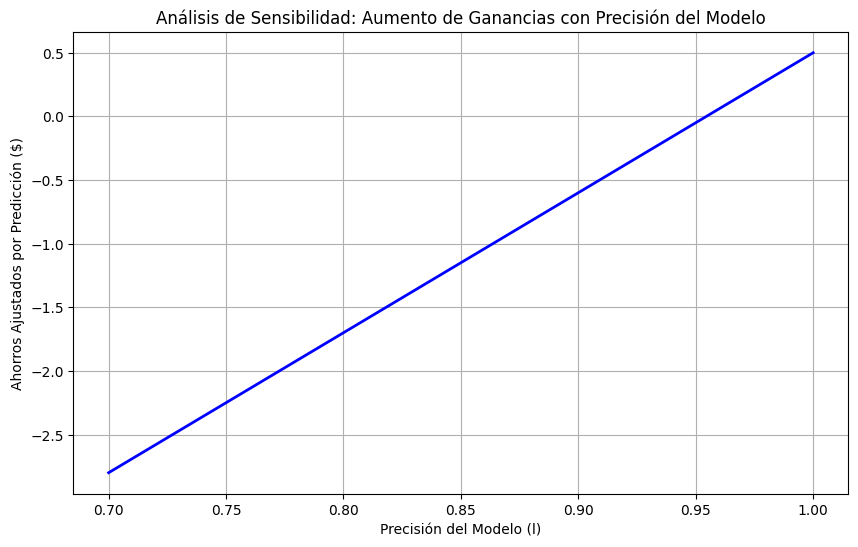

In [5]:
# Rango de precisión (l) desde 0.5 hasta 1.0 para el análisis de sensibilidad
precision_values = np.linspace(0.7, 1.0, 50)

# Cálculo de ahorros ajustados para cada valor de precisión
ahorros_ajustados_values = a - (1 - precision_values) * e

# Graficar el análisis de sensibilidad
plt.figure(figsize=(10, 6))
plt.plot(precision_values, ahorros_ajustados_values, color='blue', linewidth=2)
plt.xlabel("Precisión del Modelo (l)")
plt.ylabel("Ahorros Ajustados por Predicción ($)")
plt.title("Análisis de Sensibilidad: Aumento de Ganancias con Precisión del Modelo")
plt.grid(True)
plt.show()

La gráfica indica que, para que el modelo de automatización en el supermercado inteligente no genere pérdidas, la precisión debe alcanzar al menos un 96%. Lograr este nivel de precisión requiere una gran cantidad de datos, entrenamiento exhaustivo y conocimientos técnicos avanzados, lo cual es costoso. Además, incluso si se alcanzara una precisión perfecta (100%), el ahorro por predicción sería limitado en el contexto colombiano debido a los bajos costos de mano de obra comparados con otros países. Esto sugiere que, para que el sistema de automatización sea realmente rentable, se necesitarían optimizaciones adicionales en los costos de corrección de errores o en el ahorro por predicción, ya que el retorno de inversión en este contexto podría no ser tan significativo.


### Cálculo del ROI (Retorno de Inversión)

Para calcular el ROI, consideraremos el costo de desarrollo y despliegue del modelo, el ahorro real por predicción y el volumen de predicciones necesarias para alcanzar el punto de equilibrio.

Sin embargo como ya sabemos que no es viable con el nivel de accuracy actual que se logró, asumiremos el calculo con un acurracy de 97% para hacer el analisis más interesante asumiendo que el equipo de ingenieros expertos logró un resultado extraordinario.



In [6]:
ahorros_ajustados_extras=0.3
costo_desarrollo = 50000  
predicciones_necesarias = costo_desarrollo / ahorros_ajustados_extras

print(f"Predicciones necesarias para cubrir el costo de desarrollo: {int(predicciones_necesarias)}")


Predicciones necesarias para cubrir el costo de desarrollo: 166666


Observamos que se requieren aproximadamente 166,000 transacciones para recuperar el costo de desarrollo del modelo. Para un supermercado en sus etapas iniciales, esto implica que el proyecto sería viable principalmente para un establecimiento de cadena grande o un almacén con un alto volumen de clientes en la ciudad. 

Es decir que el negocio debe aspirar a llegar a un amplio numero de clientes para  asegurar que la inversión en automatización se recupere en un plazo razonable.


### Visualización de Ganancias a lo Largo del Tiempo

Graficaremos la ganancia acumulada a lo largo de un número determinado de predicciones para observar el crecimiento de las ganancias.


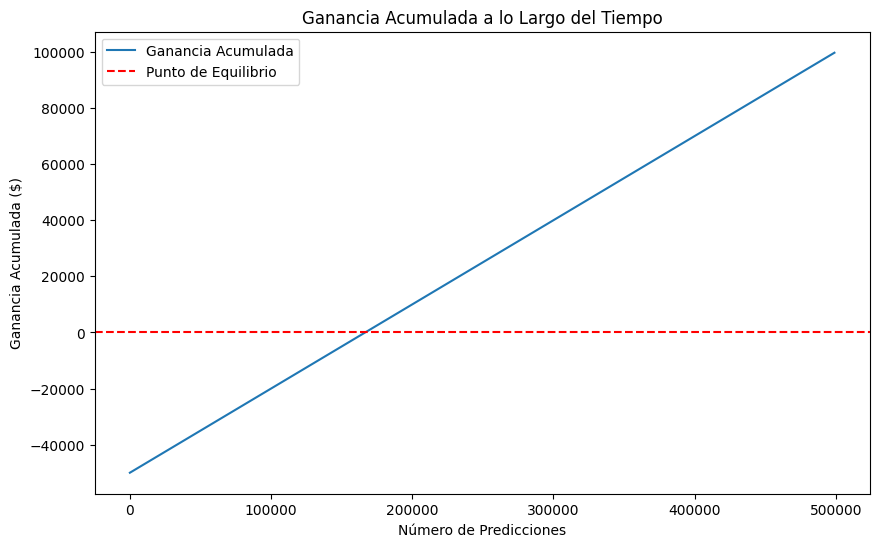

In [9]:

# Configuración para la visualización
num_predicciones = np.arange(1, 500000, 1000)
ganancia_acumulada = num_predicciones * ahorros_ajustados_extras - costo_desarrollo

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(num_predicciones, ganancia_acumulada, label="Ganancia Acumulada")
plt.axhline(0, color='red', linestyle='--', label="Punto de Equilibrio")
plt.xlabel("Número de Predicciones")
plt.ylabel("Ganancia Acumulada ($)")
plt.title("Ganancia Acumulada a lo Largo del Tiempo")
plt.legend()
plt.show()


Vemos como con un acurracy del 96% a lo largo del tiempo el negocio es rentable. Aunque sea un ahorro de 0.3 USD de centavo en centavo se podria lograr una generación de valor imporante en un mediano/largo plazo